In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# to check number of rows and columns in dataset
data.shape

(200, 4)

Our dataset consists of 200 rows and 4 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
# to check if dataset contains null values
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


##### Let's look at correlation

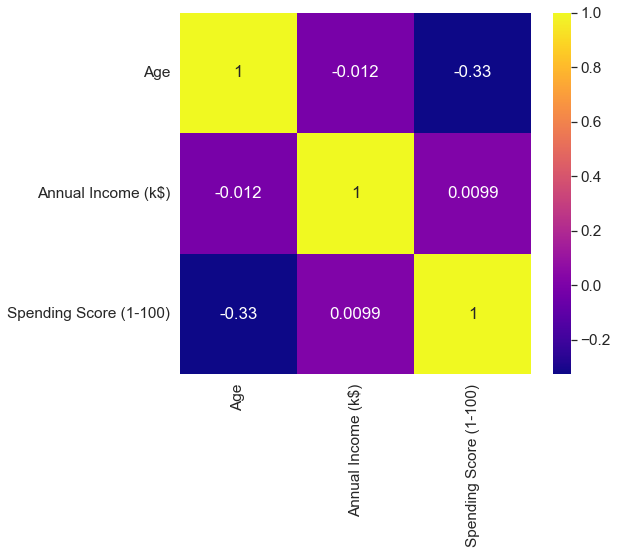

In [9]:
cor = data.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

##### It is clear form this correlation table that older customers have less income and therefore spend less money.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Annual Income'}, xlabel='Annual Income (k$)', ylabel='Density'>

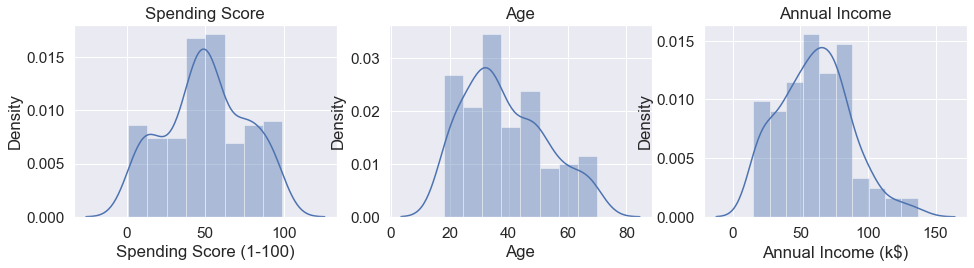

In [10]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
plt.title('Spending Score')
sns.distplot(data['Spending Score (1-100)'])

plt.subplot(3,3,2)
plt.title('Age')
sns.distplot(data['Age'])

plt.subplot(3,3,3)
plt.title('Annual Income')
sns.distplot(data['Annual Income (k$)'])

##### The distribution are generally similar to the normal distribution, with only a few standard deviation. The 'more normal' ditribution among the distribution is the 'Spending Score'. That's good because it's our target column.

In [11]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [13]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
data.head()

##### As you can see, we converted the 'Gender' column to numeric using the 'Label Encoder'. 
Male  --> 1
Female--> 0

In [14]:
spending_score_male = 0
spending_score_female = 0

for i in range(len(data)):
    if data['Gender'][i]==1:
        spending_score_male = spending_score_male + data['Spending Score (1-100)'][i]
    if data['Gender'][i]==0:
        spending_score_female = spending_score_female + data['Spending Score (1-100)'][i]
        
print(f'Males Spending Score : {spending_score_male}')
print(f'Female Spending Score : {spending_score_female}')

Males Spending Score : 4269
Female Spending Score : 5771


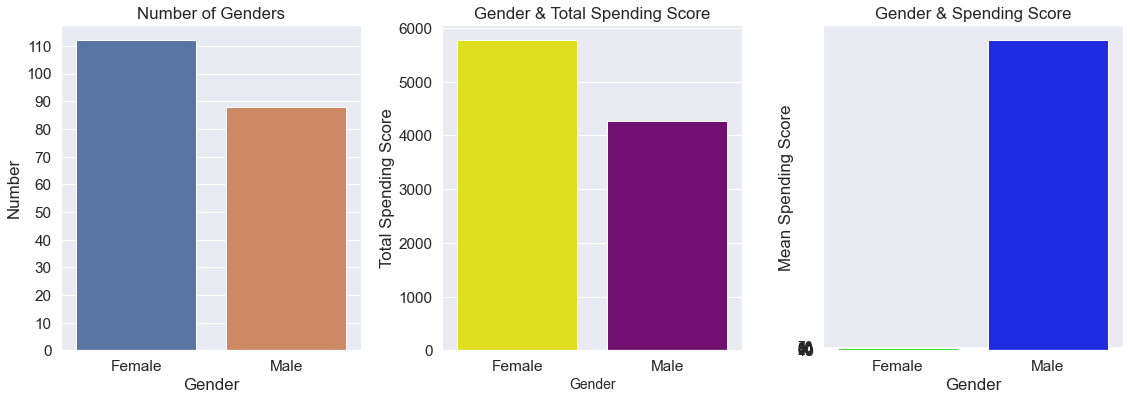

In [15]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female', 'Male'], y=data['Gender'].value_counts(), data=data)

plt.xlabel('Gender')
plt.ylabel('Number')
plt.yticks(np.arange(0,116,10))
plt.title('Number of Genders')

list_genders_spending_score = [int(spending_score_female), int(spending_score_male)]
series_genders_spending_score = pd.Series(data= list_genders_spending_score)

plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])

plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score")
plt.yticks(np.arange(0,6001,1000))
plt.title("Gender & Total Spending Score")

list_genders_spending_score_mean = [int(spending_score_female/data["Gender"].value_counts()[0]),int(spending_score_female)]
series_gender_spending_score_mean = pd.Series(data=list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_gender_spending_score_mean, palette='hsv')

plt.xlabel("Gender")
plt.ylabel("Mean Spending Score")
plt.yticks(np.arange(0,71,10),size='14')
plt.title("Gender & Spending Score")
plt.tight_layout()
plt.show()

##### What do we understand from these 3 graphs?

##### There is no significant difference in the mean spending scores of males and females. Since the spending scores are very close to each other, the difference between the total spending scores is the difference between the number of male and female customers, but this difference is not serious. Considering all this, it would be meaningless to choose a gender-based target audience.

### Let's look at the relationship between Age and Spending Score

Text(0.5, 1.0, 'Age - Spending Score')

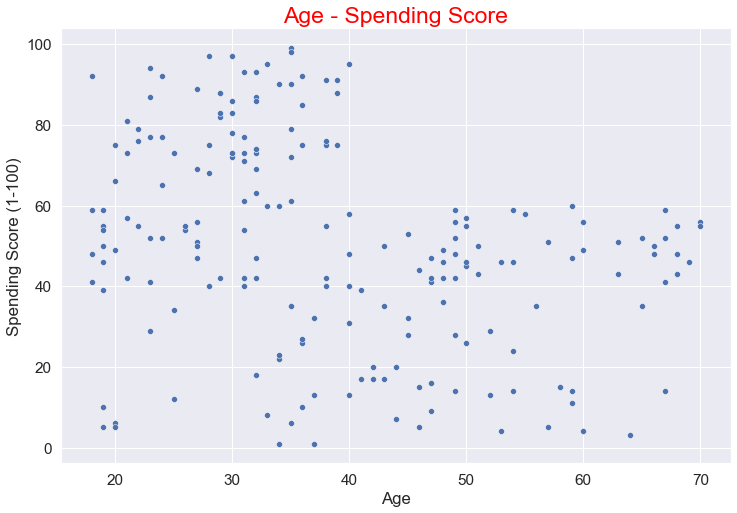

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'])
plt.title('Age - Spending Score', size=23, color='red')

#### People between the ages of 20-40 have made more purchases, considering the inference we just made about women, we can make our target audience more specific.

Let's look at the relationship between Annual income and Spending score 

Text(0.5, 1.0, 'Annual Income - Spending Score')

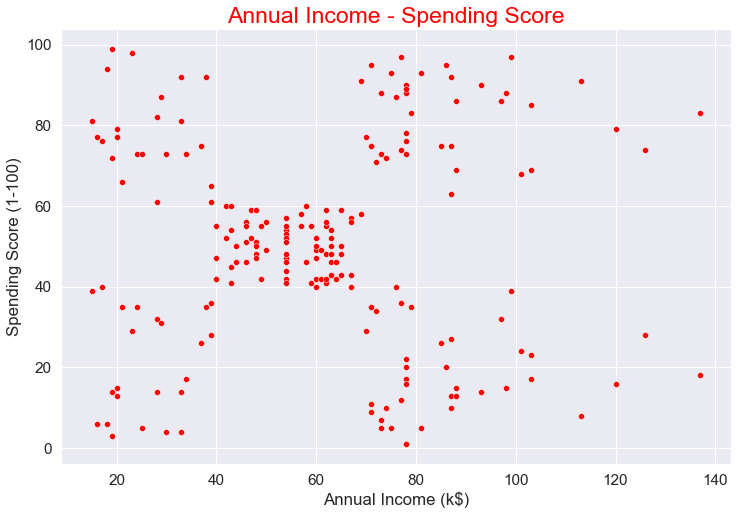

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['Annual Income (k$)'], y= data['Spending Score (1-100)'], color = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')

##### One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractice for them by choosing the target audience from the two regions above, we will see more profit can be made.

Choosing the number of clusters 

In [18]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [19]:
X = data.iloc[:,[2,3]].values

In [20]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    print(wcss)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28]
[269981.28, 181363.59595959593]
[269981.28, 181363.59595959593, 106348.37306211118]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21850.165282585633]
[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21850.165282585633, 19672.07284901432]


In [22]:
print(len(wcss))

10


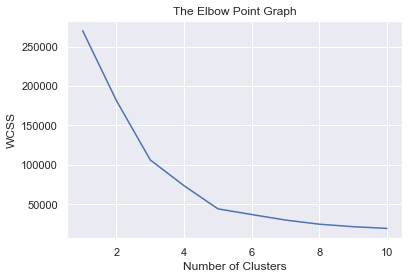

In [23]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [25]:
dummy = pd.DataFrame(Y)

In [26]:
dummy.head()

,0
0,4
1,3
2,4
3,3
4,4


In [27]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [28]:
data['Cluster']=Y

In [29]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [30]:
data.Cluster.value_counts()

1    81
2    39
0    35
4    23
3    22
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='count'>

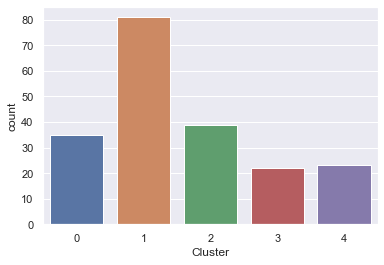

In [31]:
sns.countplot(data=data, x='Cluster')

In [32]:
dummy.head()

,0
0,4
1,3
2,4
3,3
4,4


In [33]:
dummy[0].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: 0, dtype: int64

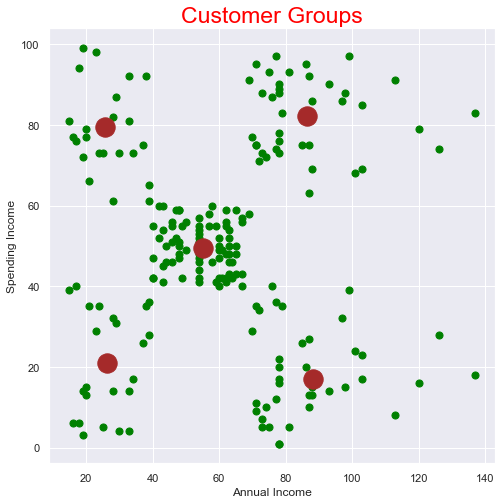

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=375, c ='brown', label = 'Centroids')

plt.title('Customer Groups', color='red', fontsize='23')
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.show()

#### PCA

In [35]:
X = data
# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components =2)
X_2D = pca.fit_transform(X)
X_2D

array([[-2.34858854e+00,  7.86632301e-01],
       [-2.38737330e+00, -2.21907061e-01],
       [-2.12813846e+00,  1.32399810e+00],
       [-2.57491942e+00, -2.76105241e-01],
       [-2.37192318e+00,  1.04266981e+00],
       [-2.56092335e+00, -3.17164419e-01],
       [-1.76022472e+00,  1.94415099e+00],
       [-2.78500029e+00, -6.86778245e-01],
       [-7.53215990e-01,  3.47409457e+00],
       [-2.28590697e+00,  8.34212139e-02],
       [-8.51002692e-01,  3.36472498e+00],
       [-2.57731134e+00, -2.88766608e-01],
       [-1.35176712e+00,  2.71819843e+00],
       [-2.46951526e+00, -3.08550642e-01],
       [-1.46742993e+00,  2.05091462e+00],
       [-2.23141589e+00, -2.29611532e-01],
       [-2.12721058e+00,  1.25144901e+00],
       [-2.06133720e+00, -5.16130470e-02],
       [-1.31569497e+00,  2.30138999e+00],
       [-2.47882747e+00, -3.43187844e-01],
       [-1.75324778e+00,  1.40473831e+00],
       [-1.99362358e+00, -4.28081718e-02],
       [-1.35986569e+00,  2.31524742e+00],
       [-1.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


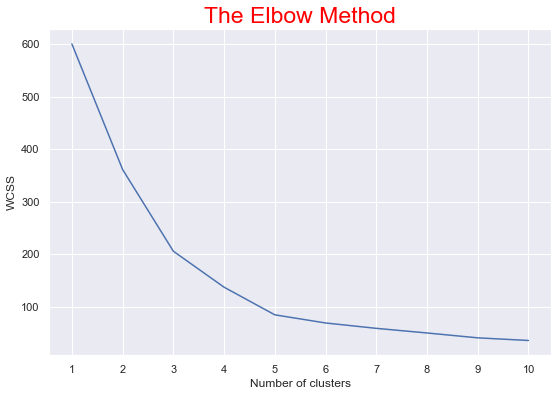

In [36]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)
    
plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red', fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

#### '4' is optimum number of clusters. Because the most break in the chart at that point. This is how we will select the next optimal n_clusters.

In [37]:
# KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

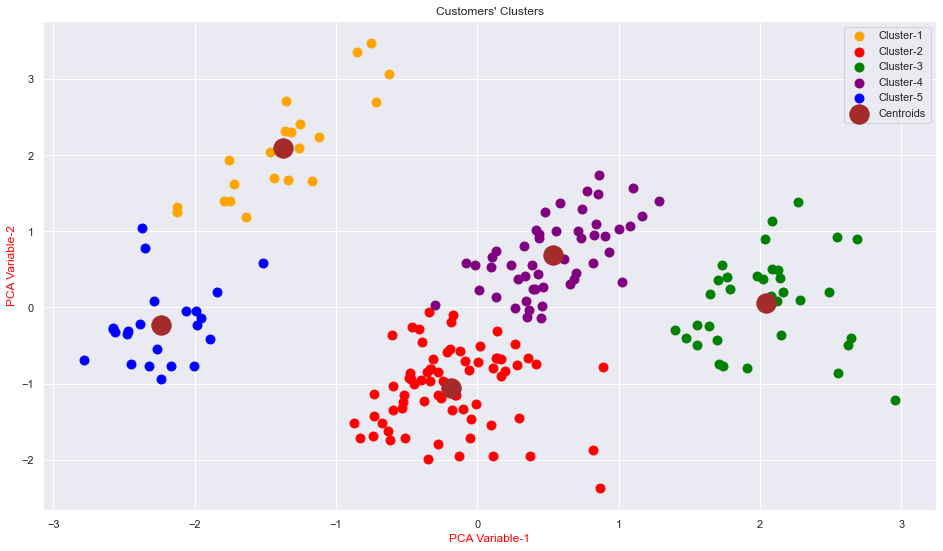

In [38]:
# cluster visualization
plt.figure(1, figsize=(16, 9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(X_2D[y_kmeans == 4, 0], X_2D[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=375, c='brown', label='Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()